# <span style="color:brown"> Red Wine Quality Prediction Project

<span style="color:blue">****Project Description****

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.          
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables           
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).              
This dataset can be viewed as classification task.                  
The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).           
Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.    

<span style="color:blue">****Attribute Information****

Input variables (based on physicochemical tests):               
1 - fixed acidity                   
2 - volatile acidity                        
3 - citric acid                     
4 - residual sugar                  
5 - chlorides             
6 - free sulfur dioxide            
7 - total sulfur dioxide             
8 - density                 
9 - pH                  
10 - sulphates             
11 - alcohol                             
Output variable (based on sensory data):                 
12 - quality (score between 0 and 10)                         
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
                       
You need to build a classification model. 


<span style="color:blue">****Inspiration****


Use machine learning to determine which physiochemical properties make a wine 'good'!


# Python Implementation-

# <span style="color:red">****Importing Necessary Libraries****

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [223]:
#Importing Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [224]:
#getting last five record
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [225]:
print(f'The rows and columns in the dataset:{df.shape}')
print(f'\n The columns in the dataset:{df.columns}')

The rows and columns in the dataset:(1599, 12)

 The columns in the dataset:Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [226]:
#chceking the data-types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<span style="color:BLUE">Observation -There are two data types of present in  dataset:(float64,int64)

# <span style="color:red">****Checking the null values****

In [227]:
#checking the null values in each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

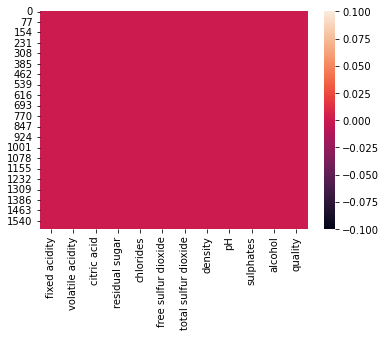

In [228]:
#Lets Visualise Null Values using Heatmap
sns.heatmap(df.isnull())

<span style="color:blue">Observation - No null values are present in any column.

In [229]:
# getting all information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# <span style="color:red">Checking Duplicate values

In [230]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df.duplicated().sum())

Total Dublicate rows are: 240


In [231]:
#showing dublicate values
duplicate=df[df.duplicated(keep=False)]

In [232]:
#removing dublicate values
df.drop_duplicates(inplace=True)
#reset the index after removing dublicate values
df.reset_index(drop=True , inplace=True)

In [233]:
#printing dataframe again
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Previously the rows in the dataset:(1599) after removing duplicate rows 1359 rows are left.


In [234]:
#checking number of unique values in each column 
df.nunique().to_frame("No of unique values")

,No of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [235]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0     53
17.0

# <span style="color:red">Description of Dataset

In [236]:
#Statistical summary of numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<span style="color:green">Observation-1) No negative value present, so this dataset is valid.               
2)Count value is same in all column ,Hence there is no missing values.      
3)The mean value is greater than median(50%) in "free sulfur dioxide","total sulfur dioxide","fixed acidity" which means data is skewed right in these.                  
4)Rest of the features's data is normally distributed.                     
5)There is huge difference in 75% and max value,it means Outliers are present in the dataset.

# <span style="color:red">Data Visualization

<span style="color:green">****Univariate Analysis****

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


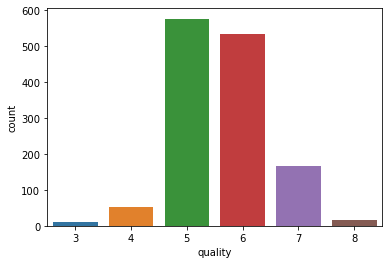

In [237]:
#Visualise the "quality" 
ax=sns.countplot(x="quality",data =df)
print(df["quality"].value_counts())

<span style="color:green">Observation-As we can see, the quality ranges from 03 to 08 but wine's quality are mostly fall in 5 and 6 that makes Data Imbalance. 

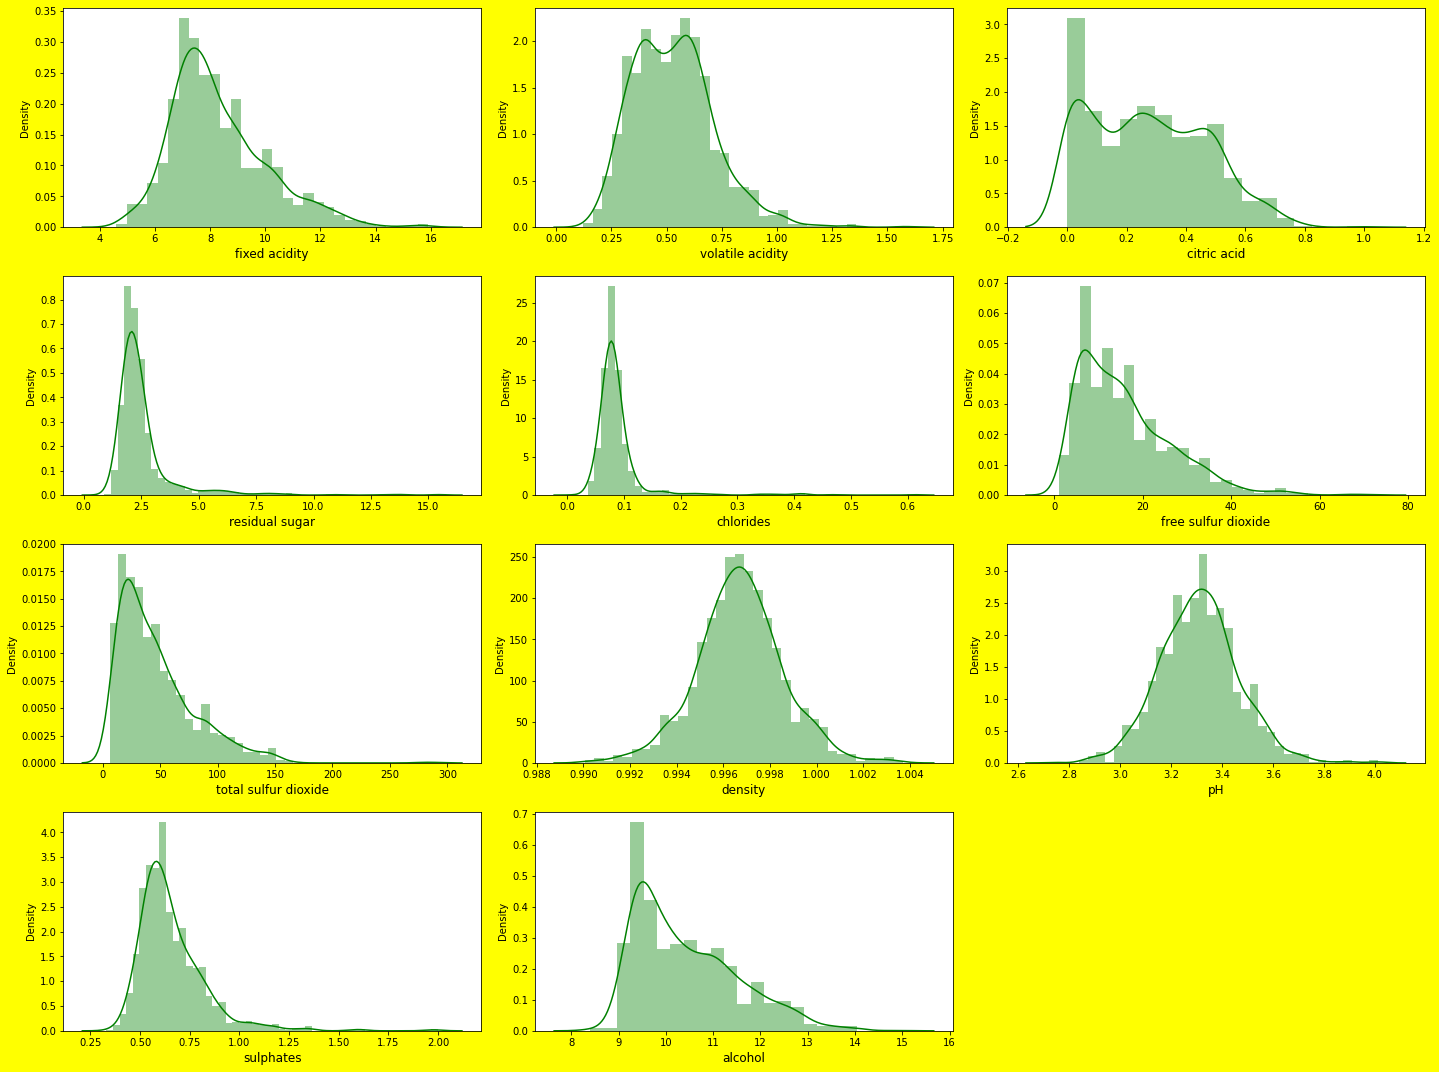

In [238]:
#Checking for data distribution in features only
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <=11: #here 11 is the number of  features
        ax = plt.subplot (4,3,plotnumber)
        sns.distplot (df [column],color='g')
        plt.xlabel (column, fontsize =12)
    plotnumber +=1
plt.tight_layout()

<span style="color:green">Observation- "free sulfur dioxide","total sulfur dioxide","fixed acidity" ,"sulphates","residual sugar","chlorides" has high skewness as compared to others features

<span style="color:red">****Bivariate Analysis****

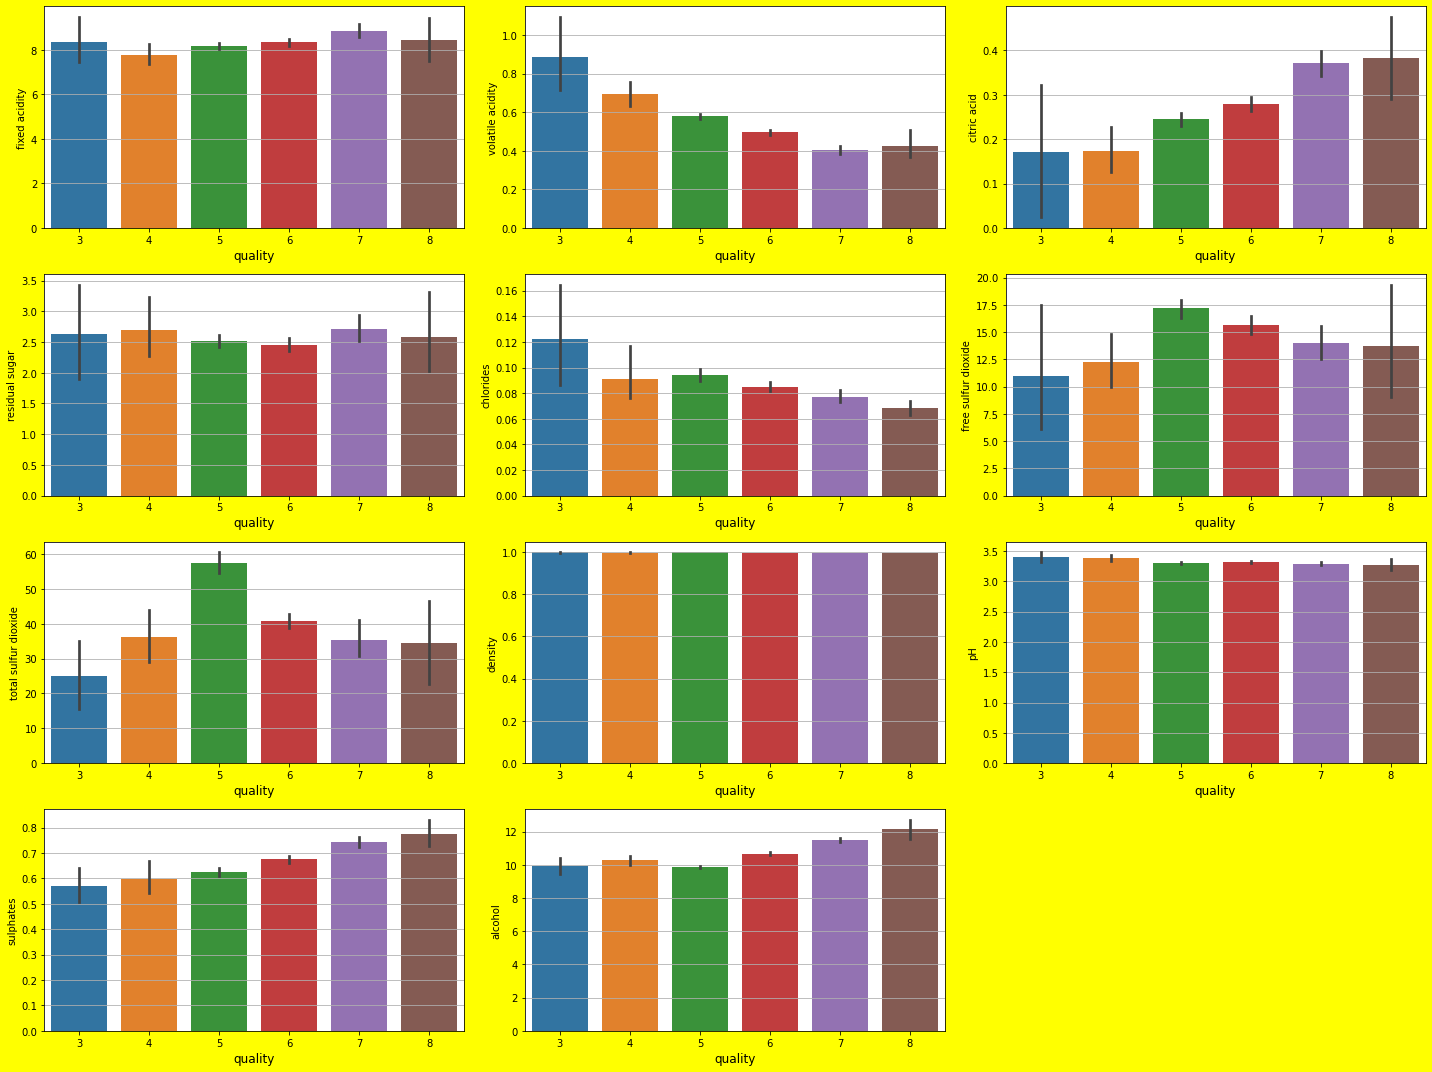

In [239]:
#Checking relationship of features with target only
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <=11: #here 11 is the number of  features
        ax = plt.subplot (4,3,plotnumber)
        sns.barplot (x="quality",y=df[column],data=df)
        plt.xlabel ("quality", fontsize =12)
        plt.grid(axis ='y')
    plotnumber +=1
plt.tight_layout()

<span style="color:green">Observation-             
Plotnumber-1)No Direct Relationship between "fixed acidity" and "quality".                              
Plotnumber-2)As'volatile acidity'increases "quality" drops.                       
Plotnumber-3)As'citric acid' increases "quality" increases.                 
Plotnumber-4)No Direct Relationship between 'residual sugar' and "quality"                  
Plotnumber-5)As'chlorides'increases "quality" drops.                
Plotnumber-6)At first'free sulfur dioxide'increases "quality" increase but when it touches maximum value and then after when it dcreases ,quality increases. 
Plotnumber-7)At first'total sulfur dioxide'increases "quality" increase but when it touches maximum value and then after when it dcreases ,quality increases.
Hence no direct relationship.                                    
Plotnumber-8,9)No Direct Relationship of 'density' and "pH" with "quality"                   
Plotnumber-10)As'sulphates' increases "quality" increases.                      
Plotnumber-11)As'alcohol' increases "quality" increases.                             

# <span style="color:red">****Checking for outliers****

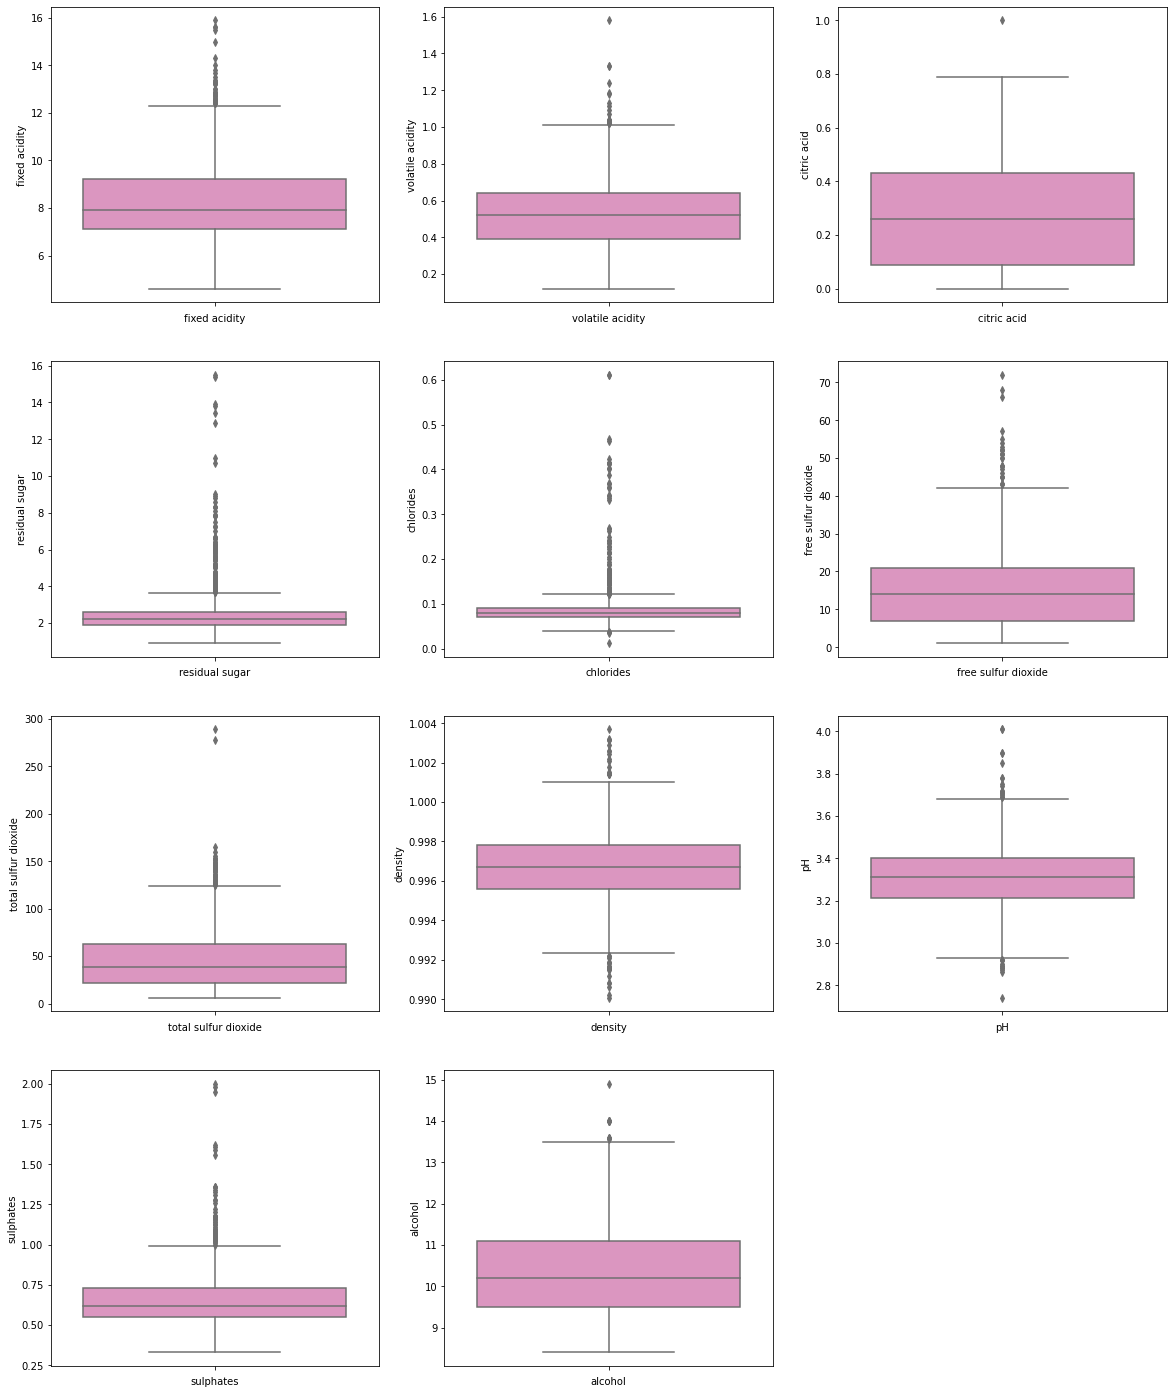

In [240]:
#checking outliers by using Boxplot
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(4,3,p)
        sns.boxplot(y=df[i], palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

<span style="color:green">Observation- Almost all Features has Outliers.Lets remove Outliers by IQR method or Z-score method.

<span style="color:red">1st Method: Z score

z-score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.
Z score = (x -mean) / std. deviation

In [241]:
from scipy.stats import zscore
outliers_feature=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
z=np.abs(zscore(outliers_feature)) #.abs() to remove negative values
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.524431,0.932000,1.393258,0.461157,0.245623,0.468554,0.384050,0.584003,1.291872,0.578561,0.954374,0.757040
1,0.294063,1.915800,1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,0.708395,0.124822,0.584575,0.757040
2,0.294063,1.259934,1.188617,0.165259,0.078535,0.085537,0.214813,0.155790,0.321247,0.051024,0.584575,0.757040
3,1.664067,1.363534,1.471711,0.461157,0.265883,0.105971,0.394471,0.691057,0.966495,0.461331,0.584575,0.457621
4,0.524431,0.713378,1.393258,0.535132,0.265883,0.277045,0.204391,0.584003,1.291872,0.578561,0.954374,0.757040
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.869983,0.494756,0.983977,0.461157,0.407702,1.159265,0.264277,0.106490,0.711149,0.945435,0.861924,0.457621
1355,1.215536,0.385444,0.983977,0.387183,0.038015,1.542281,0.084619,0.968269,0.904724,0.461331,0.062574,0.757040
1356,1.388312,0.112167,0.881656,0.239233,0.529261,2.212559,0.124983,0.850510,1.356397,0.593744,0.709723,0.457621
1357,1.388312,0.631395,0.779336,0.387183,0.265883,1.542281,0.084619,0.663167,1.679021,0.300667,0.214775,0.757040


<span style="color:blue">In normal distribution, it is estimated that                     
68% of the data points lie between +/- 1 standard deviation.                                
95% of the data points lie between +/- 2 standard deviation                              
99.7% of the data points lie between +/- 3 standard deviation  

In [242]:
#Z-score>3
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  400,  408,  420,  420,  433,  448,  450,
         473,  483,  483,  485,  485,  492,  506,  510,  513,  516,  528,
         534,  555,  562,  562,  564,  565,  565,  565,  582,  582,  592,
         597,  597,  599,  602,  626,  627,  632,  652,  671,  672,  687,
         710,  718,  722,  764,  764,  771,  781,  786,  791,  792,  838,
         866,  888,  895,  895,  912,  918,  918,  920,  920,  945,  948,
         963,  985,  994, 1003, 1013, 1049, 1052, 1060, 1060, 1060, 1073,
        1081, 1081, 1082, 1082, 1103, 1106, 1106, 1107, 1117, 1121, 1123,
        1123, 1125, 1151, 1159, 1162, 

Upper is row number and lower is column number

In [243]:
#checkling the value of z^2
print(z.iloc[1276,11])
print(z.iloc[1350,3])

3.1863625056138702
3.903341837313056


In [244]:
#now removing the data above zscore and creating a new dataframe
df1=df[(z<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df1.shape)
print("New Dataframe column's name: " ,df1.columns)


New Dataframe having rows and column:  (1232, 12)
New Dataframe column's name:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [245]:
#shape of old and new dataframe
print("OLd Dataframe : " ,df.shape[0])
print("New Dataframe : " ,df1.shape[0])

OLd Dataframe :  1359
New Dataframe :  1232


In [246]:
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage with Z-score method: 9.345106696100073


<span style="color:BLUE">Accepted Data Loss Percentage is below 10% .

In [247]:
#printing new Dataframe
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<span style="color:red">2nd Method: IQR (Inter Quantile Method)

In [248]:
#1st Quantile
q1=outliers_feature.quantile(0.25)

#3rd Quantile
q3=outliers_feature.quantile(0.75)

#calculating IQR
iqr=q3-q1

df2=df[~((df < (q1 - 1.5*iqr ))|(df > (q3 + 1.5*iqr ))).any(axis=1)]

In [249]:
print("New Dataframe after IQR : " ,df2.shape)

New Dataframe after IQR :  (1005, 12)


In [250]:
print("Data Loss Percentage  with IQR method :",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage  with IQR method : 26.048565121412803


<span style="color:green">Conclusion -Data Loss Percentage  with IQR method is very high as compared with Z-score . So i go with z-score 

In [251]:
#Storing Dataframe with Z-score method in old dataframe
df=df1

# <span style="color:red">****Removing Skewness****

In [252]:
df.skew() #Default Acceptable range of Skewnesss is (-0.5 to 0.5)

fixed acidity           0.807145
volatile acidity        0.433613
citric acid             0.276303
residual sugar          2.374715
chlorides               2.464749
free sulfur dioxide     0.867289
total sulfur dioxide    1.162598
density                 0.017683
pH                      0.118752
sulphates               0.950578
alcohol                 0.767349
quality                 0.402697
dtype: float64

<span style="color:BLUE">Skewness can be removed by following methods- log, square root,cube root or inverse transformation.

In [253]:
#Removing Skewness using cuberoot method
df["fixed acidity"]=np.cbrt(df["fixed acidity"])
df["residual sugar"]=np.cbrt(df["residual sugar"])
df["chlorides"]=np.cbrt(df["chlorides"])
df["free sulfur dioxide"]=np.cbrt(df["free sulfur dioxide"])
df["total sulfur dioxide"]=np.cbrt(df["total sulfur dioxide"])
df["sulphates"]=np.cbrt(df["sulphates"])
df["alcohol"]=np.cbrt(df["alcohol"])

In [254]:
df.skew() #Default Acceptable range of Skewnesss is (-0.5 to 0.5)

fixed acidity           0.507544
volatile acidity        0.433613
citric acid             0.276303
residual sugar          1.527389
chlorides               1.162982
free sulfur dioxide     0.126237
total sulfur dioxide    0.333459
density                 0.017683
pH                      0.118752
sulphates               0.571180
alcohol                 0.656438
quality                 0.402697
dtype: float64

In [255]:
df["residual sugar"]=np.sqrt(df["residual sugar"])
df["chlorides"]=np.sqrt(df["chlorides"])
df["alcohol"]=np.sqrt(df["alcohol"])

In [256]:
df.skew() #Default Acceptable range of Skewnesss is (-0.5 to 0.5)

fixed acidity           0.507544
volatile acidity        0.433613
citric acid             0.276303
residual sugar          1.324846
chlorides               0.877902
free sulfur dioxide     0.126237
total sulfur dioxide    0.333459
density                 0.017683
pH                      0.118752
sulphates               0.571180
alcohol                 0.629469
quality                 0.402697
dtype: float64

In [257]:
df["residual sugar"]=np.sqrt(df["residual sugar"])
df["chlorides"]=np.sqrt(df["chlorides"])
df["alcohol"]=np.sqrt(df["alcohol"])

In [258]:
df.skew() #Default Acceptable range of Skewnesss is (-0.5 to 0.5)

fixed acidity           0.507544
volatile acidity        0.433613
citric acid             0.276303
residual sugar          1.225490
chlorides               0.740857
free sulfur dioxide     0.126237
total sulfur dioxide    0.333459
density                 0.017683
pH                      0.118752
sulphates               0.571180
alcohol                 0.616095
quality                 0.402697
dtype: float64

<span style="color:green">Observation-We can minimise the skewness after using skewness method multiple times.lets go with these.

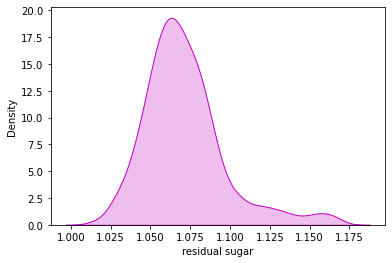

In [259]:
#Lets vsualize how the data has been been distributed after removing skewness
sns.distplot(df["residual sugar"],color='m',kde_kws ={"shade":True},hist=False)
plt.show()

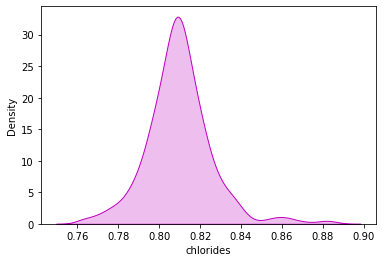

In [260]:
sns.distplot(df["chlorides"],color='m',kde_kws ={"shade":True},hist=False)
plt.show()

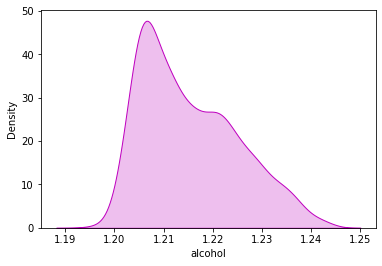

In [261]:
sns.distplot(df["alcohol"],color='m',kde_kws ={"shade":True},hist=False)
plt.show()

<span style="color:green">Observation-Hence Data distribution looks good.

# <span style="color:red">****Correlation between target variable and Independent variable****

In [262]:
#checking Correlation 
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296075,0.689025,0.209355,0.199996,-0.148324,-0.093589,0.662247,-0.721743,0.199498,-0.030442,0.137805
volatile acidity,-0.296075,1.000000,-0.586314,0.035273,0.096838,0.027015,0.110975,0.004609,0.262100,-0.344469,-0.217557,-0.359736
citric acid,0.689025,-0.586314,1.000000,0.185214,0.093459,-0.082368,-0.007582,0.358471,-0.526370,0.318093,0.166602,0.245672
residual sugar,0.209355,0.035273,0.185214,1.000000,0.170511,0.020133,0.096567,0.370528,-0.083370,0.052417,0.156310,0.046110
chlorides,0.199996,0.096838,0.093459,0.170511,1.000000,-0.021984,0.096965,0.372292,-0.201801,0.010072,-0.262021,-0.151985
free sulfur dioxide,-0.148324,0.027015,-0.082368,0.020133,-0.021984,1.000000,0.749073,-0.024160,0.104523,0.039402,-0.102447,-0.076561
total sulfur dioxide,-0.093589,0.110975,-0.007582,0.096567,0.096965,0.749073,1.000000,0.141008,-0.001034,-0.022817,-0.289775,-0.222687
density,0.662247,0.004609,0.358471,0.370528,0.372292,-0.024160,0.141008,1.000000,-0.322901,0.126242,-0.478366,-0.179034
pH,-0.721743,0.262100,-0.526370,-0.083370,-0.201801,0.104523,-0.001034,-0.322901,1.000000,-0.044527,0.140675,-0.078959
sulphates,0.199498,-0.344469,0.318093,0.052417,0.010072,0.039402,-0.022817,0.126242,-0.044527,1.000000,0.260120,0.398256


<AxesSubplot:>

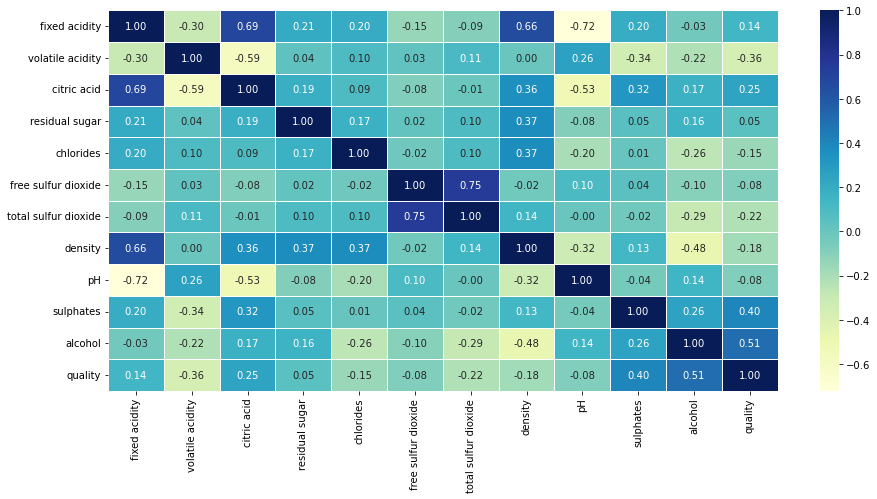

In [263]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap = "YlGnBu")

In [264]:
#checking Correlation with "quality" Column
df.corr().quality.sort_values()

volatile acidity       -0.359736
total sulfur dioxide   -0.222687
density                -0.179034
chlorides              -0.151985
pH                     -0.078959
free sulfur dioxide    -0.076561
residual sugar          0.046110
fixed acidity           0.137805
citric acid             0.245672
sulphates               0.398256
alcohol                 0.505544
quality                 1.000000
Name: quality, dtype: float64

<span style="color:blue">Here are some  values for the correlation coefficient:            
0-0.19: Very weak                
0.2-0.39: Weak                 
0.40-0.59: Moderate                  
0.6-0.79: Strong                        
0.8-1: Very strong             

<span style="color:green">Observation-1)volatile acidity , pH, chlorides , free sulphur dioxide, total sulphur dioxide , density has negative correlation.                        
2)alcohol, sulphates,citric acid ,residual suagr ,fixed acidity has positive correlation with target variable.

<span style="color:red">****As suggested in the problem discription, converting the labels into only two variables. 
Reference text (What might be an interesting thing to do, is to set an arbitrary cutoff 
for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1'
and the remainder as 'not good/0'.)****

In [266]:
#  For " good /1" label variable
df.loc[df.quality >= 7, 'quality'] = 1
#  For " not good /0" label variable
df.loc[df.quality >1, 'quality'] = 0
#number of "good" and "not good "quality of wine
df.quality.value_counts()

0    1063
1     169
Name: quality, dtype: int64

0    1063
1     169
Name: quality, dtype: int64


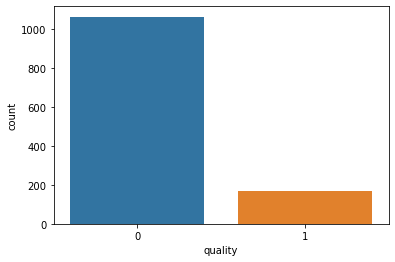

In [267]:
#Visualise the "quality" column again
ax=sns.countplot(x="quality",data =df)
print(df["quality"].value_counts())

<span style="color:green">Observation-There is  Class Imbalance in data. we can rectify it by using Oversampling method in later part. 

# <span style="color:red">****Seperating Feature and Label**** 

In [268]:
#Seperating Feature and label into x and y
x=df.drop(["quality"],axis=1)
y=df["quality"]

print("Feature Dimension :" ,x.shape)
print("Target Dimension :" ,y.shape)

Feature Dimension : (1232, 11)
Target Dimension : (1232,)


# <span style="color:red">****Feature Elimination Using p-values****

In [269]:
#Select features according to a percentile of the highest scores.
from sklearn.feature_selection import SelectPercentile,chi2
SP = SelectPercentile(score_func = chi2)
SP = Spercentile.fit(x,y)
feature_scores = pd.DataFrame({'Features': x.columns, 'chi2score': SP.scores_, 'p_values': SP.pvalues_})
feature_scores.sort_values('chi2score', ascending = True)

,Features,chi2score,p_values
7,density,0.000099,0.992064
3,residual sugar,0.005339,0.941753
4,chlorides,0.008209,0.927808
10,alcohol,0.017677,0.894229
8,pH,0.042998,0.835728
0,fixed acidity,0.147271,0.701157
9,sulphates,0.443653,0.505365
5,free sulfur dioxide,1.279602,0.257973
1,volatile acidity,4.881378,0.027148
6,total sulfur dioxide,7.381496,0.006590


<span style="color:green">Observation- A P-value less than 0.5 is statistically significant, while a value higher than 0.5.
"residual sugar","density","chlorides","alcohol" variables create less impact on "quality" , Hence to be dropped.

In [270]:
x=df.drop(["residual sugar","density","chlorides","alcohol"],axis=1)
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates'],
      dtype='object')

# <span style="color:red">****Feature Scaling Using Standard Scaler**** 

In [271]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,sulphates
0,-0.522070,1.023020,-1.396433,-0.289125,-0.169087,1.395796,-0.620726
1,-0.256592,2.070146,-1.396433,1.087294,0.902015,-0.804660,0.361991
2,-0.256592,1.372062,-1.186653,0.187153,0.534809,-0.378765,0.127909
3,1.699524,-1.420272,1.540487,0.393742,0.710869,-1.088589,-0.447788
4,-0.522070,0.790326,-1.396433,-0.038719,0.065923,1.395796,-0.620726
...,...,...,...,...,...,...,...
1227,-0.938855,0.557631,-0.976873,1.308632,-0.009629,0.756954,1.371730
1228,-1.380937,0.441284,-0.976873,1.580388,0.209785,0.969901,-0.447788
1229,-1.612743,0.150416,-0.871983,2.005893,0.441851,1.466778,0.954283
1230,-1.612743,0.703065,-0.767093,1.580388,0.209785,1.821691,0.589285


# <span style="color:red">****Detecting Multicollinearity Using a Variance Inflation Factor (VIF)****

In [272]:
#finding VIF in each scaled column i.e x_scaled.shape[1](1/1- R^2 )

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x_scaled.values, i) for i in range(len(x_scaled.columns))]
vif["Features"] = x_scaled.columns

vif

,VIF,Features
0,3.129605,fixed acidity
1,1.757435,volatile acidity
2,2.905556,citric acid
3,2.445560,free sulfur dioxide
4,2.505528,total sulfur dioxide
5,2.220296,pH
6,1.208862,sulphates


<span style="color:green">Conclusion -There is no case of multicollinearity

# <span style="color:red">****Data Balance by Oversampling****

In [273]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_scaled,y)

In [274]:
y1.value_counts()

0    1063
1    1063
Name: quality, dtype: int64

<span style="color:green">Conclusion -Hence Data is balanced .

# <span style="color:red">****Split the data into training and testing sets****

In [277]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x1, y1, test_size = .30, random_state = 48)
print("Total Size Of Feature in Dataset :",x1.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y1.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (2126, 7)
Total Size Of Training Feature Dataset :  (1488, 7)
Total Size Of Testing Feature Dataset :  (638, 7)
Total Size Of Label in Dataset : (2126,)
Total Size Of Training Label Dataset :  (1488,)
Total Size Of Testing Label Dataset :  (638,)


# <span style="color:red">****------------------Models--------------------****

# Logistic Regression

In [287]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(x_test) 

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7711598746081505
Confusion Matrix:
 [[235  81]
 [ 65 257]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       316
           1       0.76      0.80      0.78       322

    accuracy                           0.77       638
   macro avg       0.77      0.77      0.77       638
weighted avg       0.77      0.77      0.77       638



# XGBClassifier

In [286]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9106583072100314
Confusion Matrix:
 [[276  40]
 [ 17 305]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       316
           1       0.88      0.95      0.91       322

    accuracy                           0.91       638
   macro avg       0.91      0.91      0.91       638
weighted avg       0.91      0.91      0.91       638



#  KNNClassifier

In [288]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict (x_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8620689655172413
Confusion Matrix:
 [[236  80]
 [  8 314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.84       316
           1       0.80      0.98      0.88       322

    accuracy                           0.86       638
   macro avg       0.88      0.86      0.86       638
weighted avg       0.88      0.86      0.86       638



#  Decision Tree Classifier

In [289]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict (x_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8448275862068966
Confusion Matrix:
 [[254  62]
 [ 37 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84       316
           1       0.82      0.89      0.85       322

    accuracy                           0.84       638
   macro avg       0.85      0.84      0.84       638
weighted avg       0.85      0.84      0.84       638



# SVM

In [291]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict (x_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8463949843260188
Confusion Matrix:
 [[241  75]
 [ 23 299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83       316
           1       0.80      0.93      0.86       322

    accuracy                           0.85       638
   macro avg       0.86      0.85      0.85       638
weighted avg       0.86      0.85      0.85       638



# AdaBoostClassifier

In [292]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict (x_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8385579937304075
Confusion Matrix:
 [[260  56]
 [ 47 275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       316
           1       0.83      0.85      0.84       322

    accuracy                           0.84       638
   macro avg       0.84      0.84      0.84       638
weighted avg       0.84      0.84      0.84       638



# RandomForest Classifier

In [293]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9059561128526645
Confusion Matrix:
 [[276  40]
 [ 20 302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       316
           1       0.88      0.94      0.91       322

    accuracy                           0.91       638
   macro avg       0.91      0.91      0.91       638
weighted avg       0.91      0.91      0.91       638



# <span style="color:green">Here we see that XGBClassifier works the best in this dataset with accuracy 91%.

<span style="color:red">****AUC- RUC Curve**** 

In [294]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

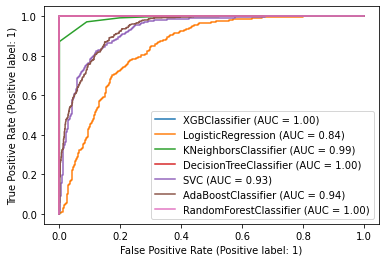

In [297]:
#For Training Data
disp = plot_roc_curve (xgb, x_train, y_train)
plot_roc_curve (logreg, x_train, y_train, ax = disp.ax_)
plot_roc_curve (knn, x_train, y_train, ax = disp.ax_)
plot_roc_curve (dtc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (svc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (ada, x_train, y_train, ax = disp.ax_)
plot_roc_curve (RFC, x_train, y_train, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

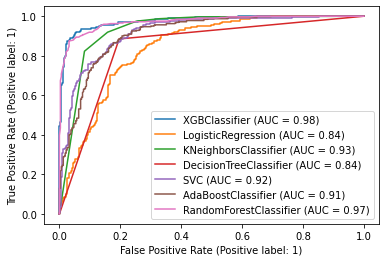

In [298]:
#For Tetsing Data
disp = plot_roc_curve (xgb, x_test, y_test)
plot_roc_curve (logreg, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plot_roc_curve (RFC, x_test, y_test, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

#  <span style="color:green">Clearly XGB Classifier is the best in this dataset

<span style="color:red">****Hyper Parameter Tuning****

In [300]:
from sklearn.model_selection import GridSearchCV, KFold

params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [301]:
gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs2.fit(x_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.8918010752688171
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}


In [302]:
xgb = XGBClassifier(n_estimator = 500, base_score = 0.5,learning_rate = 0.1, reg_aplha = 0, reg_lamdba = 0.5)
xgb.fit(x_train, y_train)
y_pred = xgb.predict (x_test)

[08:58:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator", "reg_aplha", "reg_lamdba" } are not used.



In [303]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9059561128526645

<span style="color:red">****The Accuracy is Same as before****

# <span style="color:green">Conclusion- 

<span style="color:green">Based on the analysis performed on the Vinho Verde wine dataset, a classification model was built to predict
the quality of wine based on its physicochemical properties. The model XGB Classifier achieved an accuracy of 91%, which suggests that it is only slightly better than RandomForestClassifie in predicting the quality of wine
XGB Classifier performs best to predict the wine quality.